# EDA

# 0.0 IMPORTS

In [11]:
from bs4 import BeautifulSoup
import requests
import time
import random
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display      import HTML
import numpy as np



def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

import warnings
warnings.filterwarnings("ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.1 Load Data

In [12]:
df_metadados_limpos_3=pd.read_csv('/home/tc0019/DS/car_price_prediction/data/raw/df_metadados_limpos_3.csv')
df_metadados_limpos_3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79117 entries, 0 to 79116
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           79117 non-null  int64  
 1   TITULO       79117 non-null  object 
 2   UF           79117 non-null  object 
 3   Ano          79117 non-null  float64
 4   KM           79117 non-null  float64
 5   CAMBIO       79117 non-null  object 
 6   COMBUSTIVEL  79117 non-null  object 
 7   VALOR_LIMPO  79117 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.8+ MB


Checking dataframe

In [13]:
df_metadados_limpos_3.describe().round(2)

,ID,Ano,KM,VALOR_LIMPO
count,7.911700e+04,79117.00,7.911700e+04,79117.00
mean,1.009786e+09,2014.40,4.306150e+06,126150.23
std,3.229385e+07,6.94,1.756322e+08,1650062.61
min,4.733270e+08,1950.00,0.000000e+00,0.00
25%,1.007340e+09,2012.00,3.200000e+04,36900.00
50%,1.020753e+09,2016.00,6.986000e+04,59900.00
75%,1.026599e+09,2019.00,1.130000e+05,95990.00
max,1.028464e+09,2023.00,1.000000e+10,99000000.00


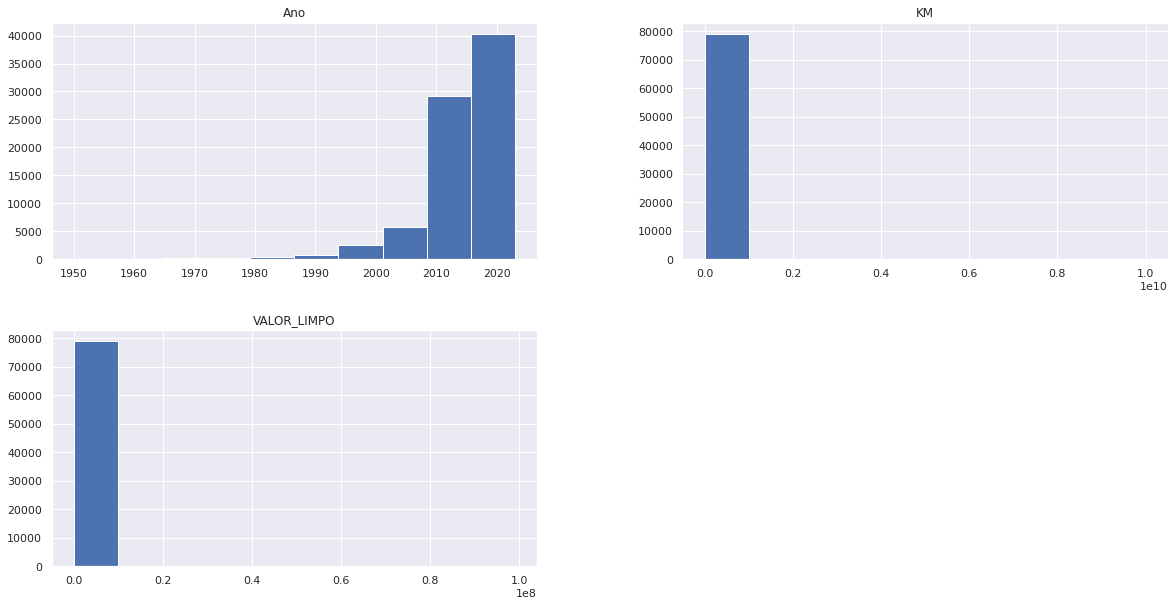

In [14]:
# drop duplicated ID's
colunas_numericas=['Ano', 'KM', 'VALOR_LIMPO']
df_metadados_limpos_3.loc[:, colunas_numericas].hist(figsize=(20,10));

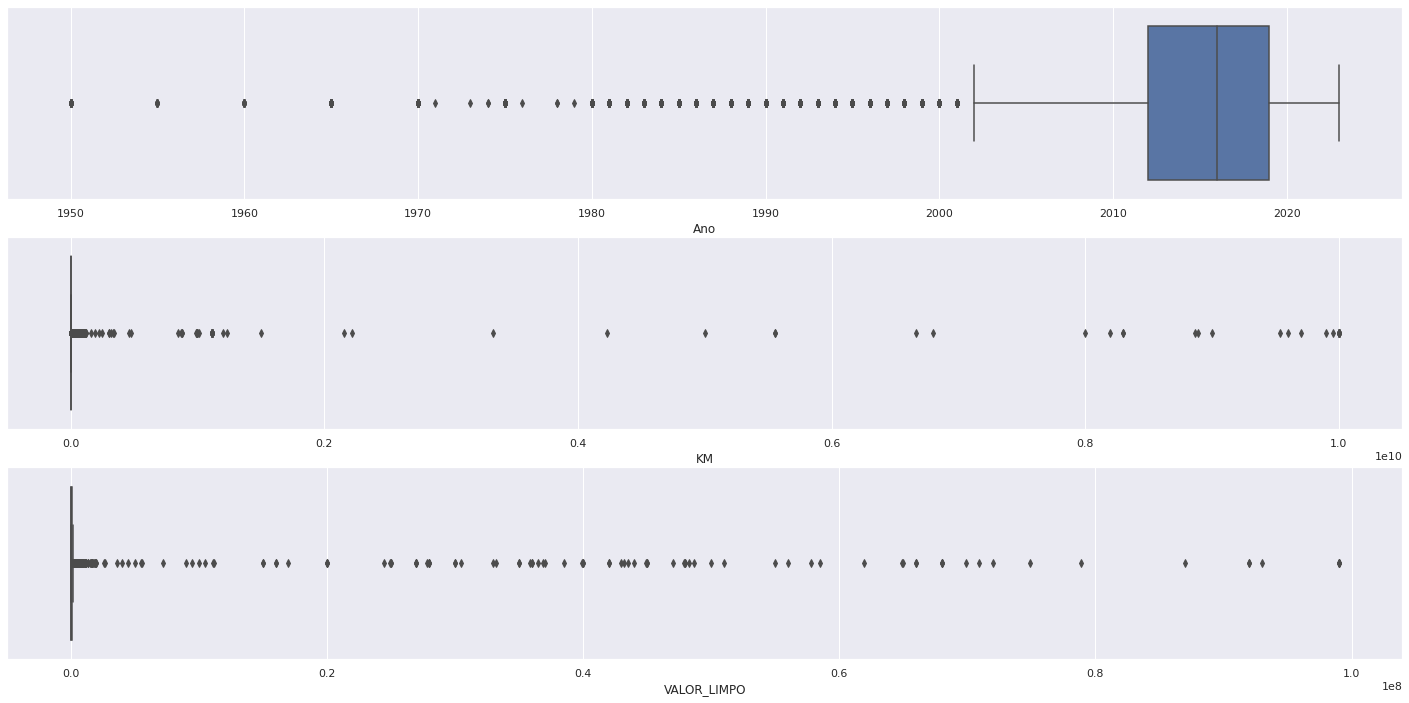

In [15]:
plt.subplot(3,1,1)
sns.boxplot(x=df_metadados_limpos_3.Ano, data=df_metadados_limpos_3);
plt.subplot(3,1,2)
sns.boxplot(x=df_metadados_limpos_3.KM, data=df_metadados_limpos_3);
plt.subplot(3,1,3)
sns.boxplot(x=df_metadados_limpos_3.VALOR_LIMPO, data=df_metadados_limpos_3);


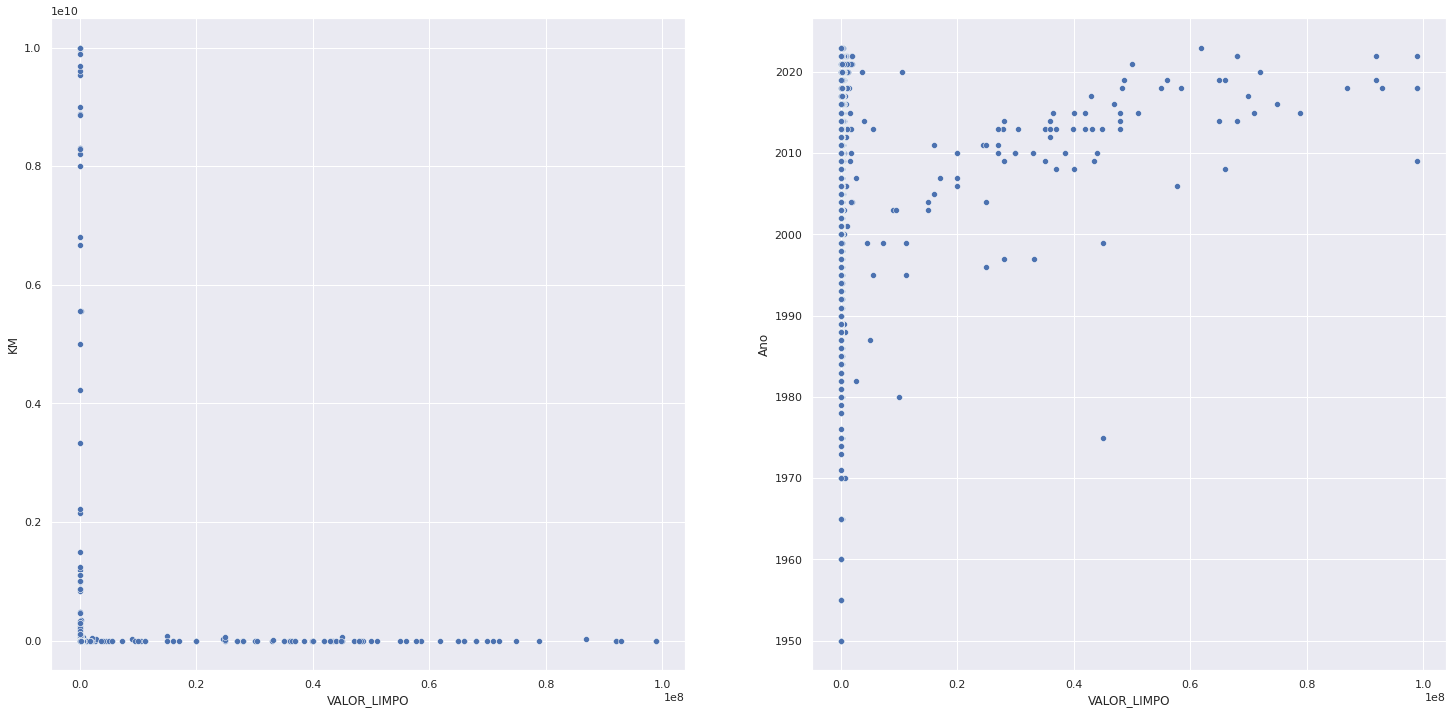

In [16]:
# analysing possible relation btw variables

fig,axs=plt.subplots(1,2)
sns.scatterplot(x='VALOR_LIMPO', y='KM', data=df_metadados_limpos_3,ax=axs[0]);
sns.scatterplot(x='VALOR_LIMPO', y='Ano', data=df_metadados_limpos_3,ax=axs[1]);

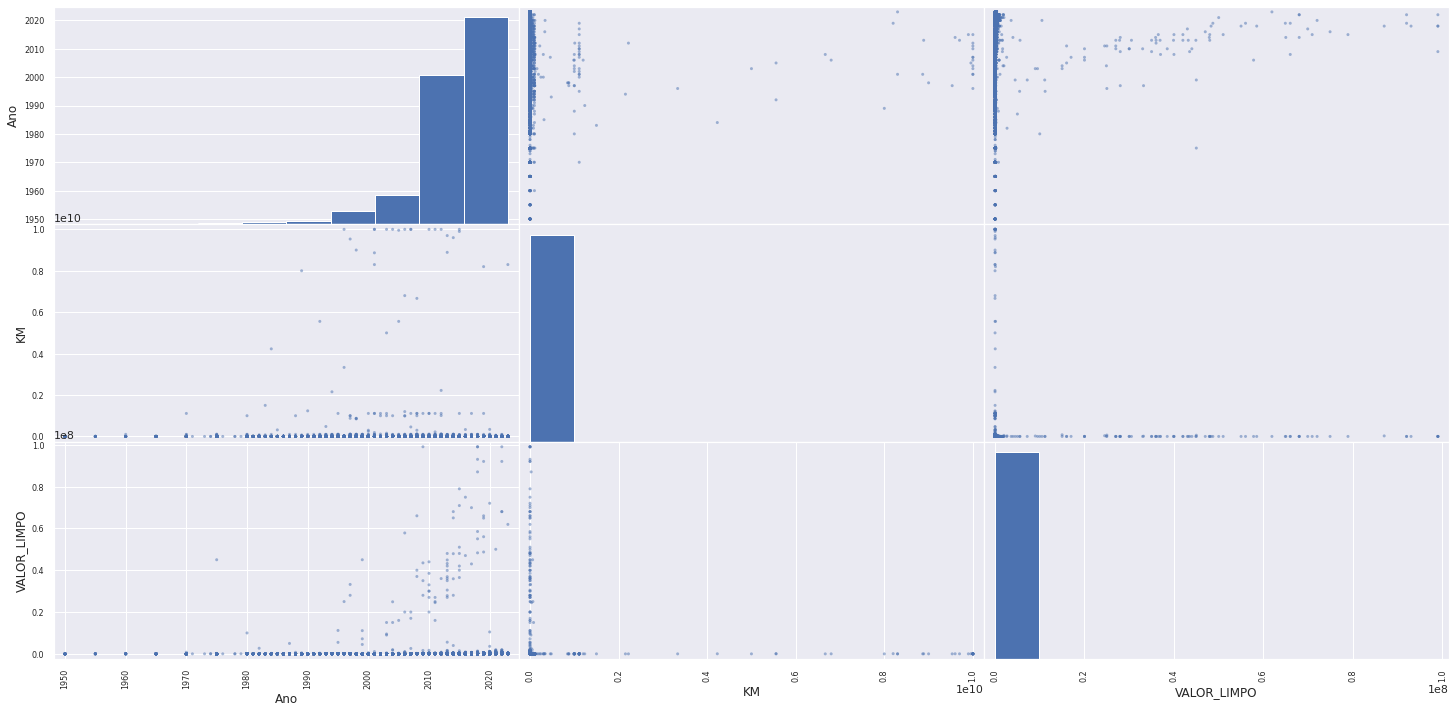

In [17]:
pd.plotting.scatter_matrix(df_metadados_limpos_3[colunas_numericas]);

# Outlier Analysis
 - VALOR_LIMPO

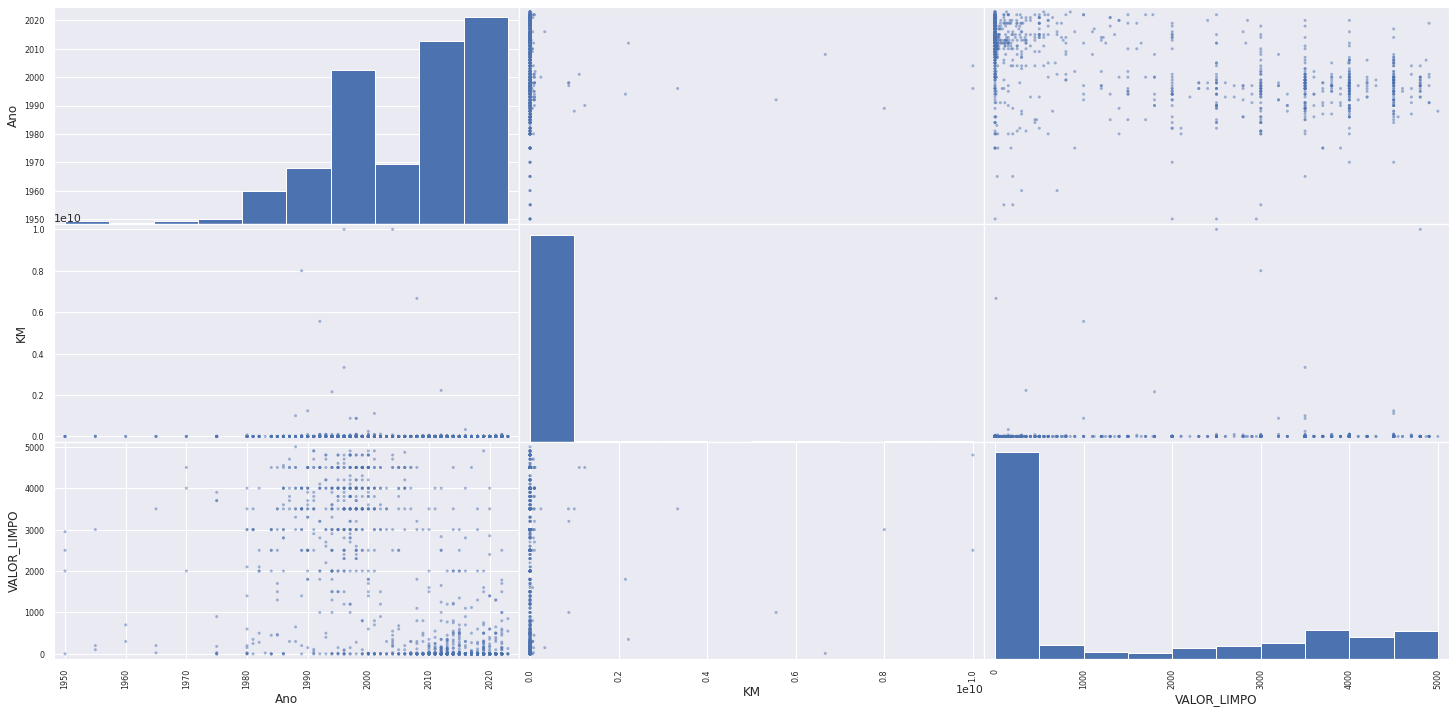

In [18]:
dados=df_metadados_limpos_3.query('VALOR_LIMPO < 5000')
pd.plotting.scatter_matrix(dados[colunas_numericas]);

In [19]:
dados.describe().round()

,ID,Ano,KM,VALOR_LIMPO
count,1.350000e+03,1350.0,1.350000e+03,1350.0
mean,1.015089e+09,2007.0,4.282966e+07,1310.0
std,2.588937e+07,13.0,5.194414e+08,1714.0
min,7.539046e+08,1950.0,0.000000e+00,0.0
25%,1.014412e+09,1997.0,3.000000e+02,0.0
50%,1.023270e+09,2011.0,5.000000e+04,110.0
75%,1.026752e+09,2017.0,1.200000e+05,3000.0
max,1.028434e+09,2023.0,1.000000e+10,4999.0


In [20]:
dados.sample(10)

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
48228,1027507853,fiat mobi 1.0,am,2018.0,57000.0,manual,flex,0.0
1864,1027543973,fiorino,ce,1994.0,1111.0,manual,gasolina,3000.0
72490,960291492,vw gol 1.6 msi 2018,al,2018.0,109000.0,manual,flex,0.0
24609,1027345425,fusca 1980,mt,1980.0,99999.0,manual,gasolina,3500.0
4961,1027442667,vender rápido 750.00,go,2014.0,7000.0,manual,flex,750.0
49241,979644008,volkswagen golf 2.0 mi black edition 4p 2011,am,2011.0,300.0,automático,flex,0.0
45514,1006461494,engate,ro,1988.0,6000.0,manual,gasolina,300.0
61764,1027132834,aluguel de veículo,ma,2022.0,12700.0,manual,flex,150.0
26202,1022625784,vendo ou troco aceito proposta,mt,1998.0,11111111.0,manual,gasolina,3000.0
48403,1027368364,chevette ano 91 .1.6,am,1991.0,1111.0,manual,gasolina,4700.0


CONCLUSION

- we can see that there are many records with values between 0 and 500 in VALOR_LIMPO
- these records can be different types of advertisements such as accessories
- even if it is automobiles, we need the VALUE information
- We can observe that there is a growth according to the increase in values from 2,000 onwards.
- We can see that there are older cars with values between 3,000 - 5,000 (cell with head())
- Therefore, let's Eliminate records with *VALUE below 5,000

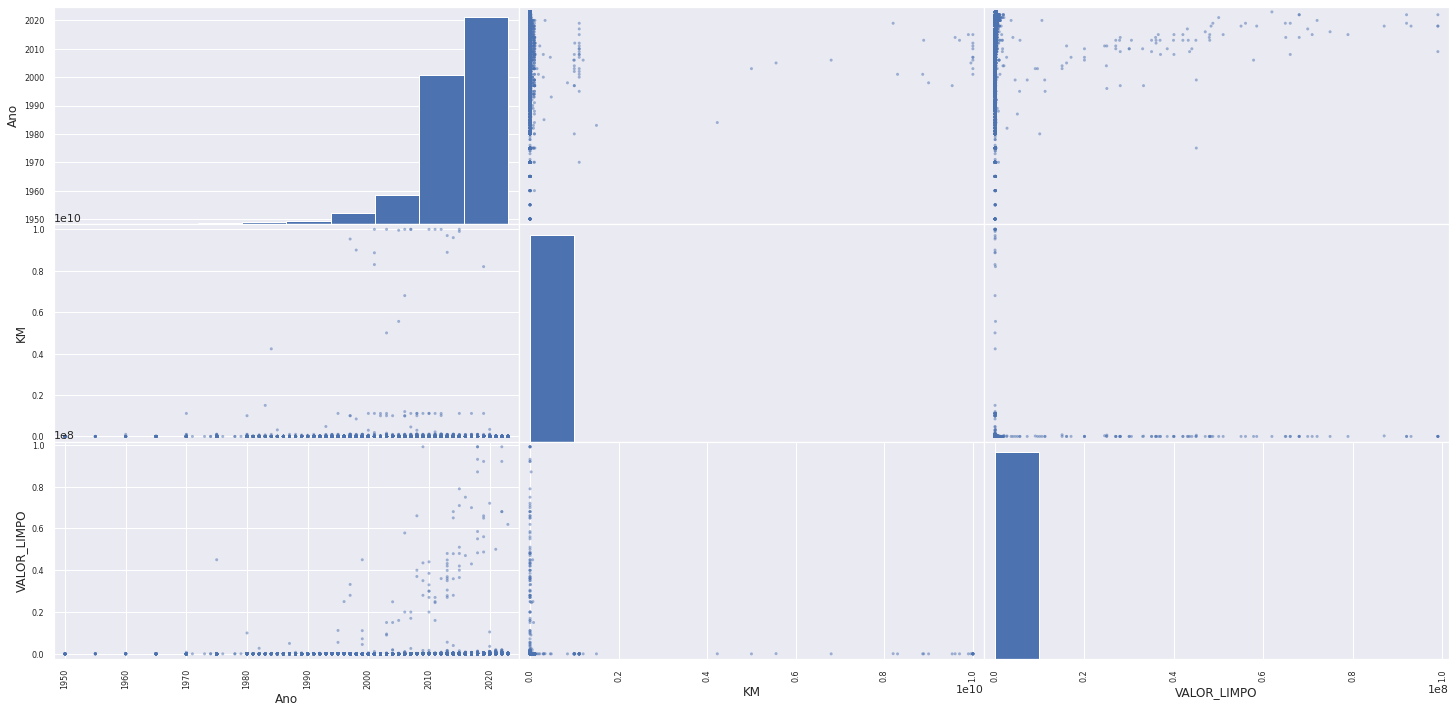

In [21]:
df_metadados_sem_outlier=df_metadados_limpos_3.query('VALOR_LIMPO > 5000')
pd.plotting.scatter_matrix(df_metadados_sem_outlier[colunas_numericas]);

In [22]:
df_metadados_sem_outlier.describe().round()

,ID,Ano,KM,VALOR_LIMPO
count,7.763800e+04,77638.0,7.763800e+04,77638.0
mean,1.009676e+09,2015.0,3.400712e+06,128522.0
std,3.240879e+07,7.0,1.566709e+08,1665615.0
min,4.733270e+08,1950.0,0.000000e+00,5200.0
25%,1.007232e+09,2012.0,3.300000e+04,38000.0
50%,1.020642e+09,2016.0,7.000000e+04,60000.0
75%,1.026599e+09,2019.0,1.130000e+05,97000.0
max,1.028464e+09,2023.0,1.000000e+10,99000000.0


In [23]:
df_metadados_sem_outlier.sample(10)

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
63239,1024076037,stilo 1.8 sporting,ma,2008.0,0.0,manual,flex,25000.0
37459,1017074779,ka 1.5 se plus automático 2020 15mil km impecá...,ac,2020.0,15000.0,automático,flex,69510.0
16509,1027987895,volkswagen golf 1.6 sportline 2012,pr,2012.0,156292.0,manual,flex,50900.0
7202,1009248375,frontier xe 2019 apenas 40 mil km rodados,pb,2019.0,40560.0,automático,diesel,189900.0
8032,825660443,chery arrizo 5 1.5 vvt turbo iflex rts,pb,2021.0,0.0,automático,flex,88690.0
76119,1022784896,eco sport 1.6,sc,2013.0,89000.0,manual,flex,59900.0
25750,977064280,sandero 2019/2020 1.6 16v sce flex stepway zen...,mt,2020.0,61360.0,manual,flex,65990.0
28000,1009872737,onix premier turbo automático 2021,mt,2021.0,37000.0,automático,flex,91900.0
22962,1015330850,vendo carro,to,2020.0,30000.0,manual,flex,85000.0
19639,1010771365,"320 sport turbo 2.0 apenas 12.000 km, igual a 0km",df,2020.0,12000.0,automático,gasolina,239900.0


Conclusion > 5000

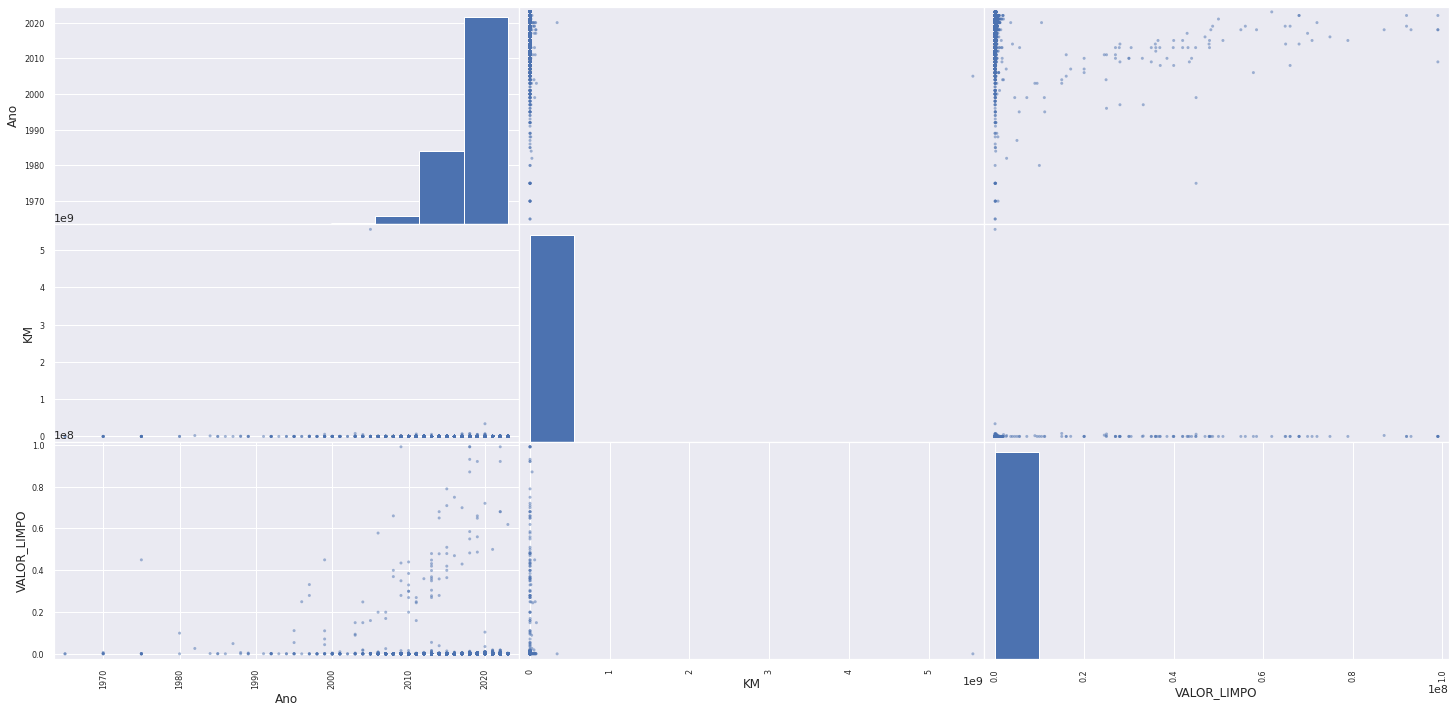

In [24]:
dados=df_metadados_sem_outlier.query('VALOR_LIMPO > 100000')
pd.plotting.scatter_matrix(dados[colunas_numericas]);

In [25]:
df_metadados_sem_outlier.describe().round()

,ID,Ano,KM,VALOR_LIMPO
count,7.763800e+04,77638.0,7.763800e+04,77638.0
mean,1.009676e+09,2015.0,3.400712e+06,128522.0
std,3.240879e+07,7.0,1.566709e+08,1665615.0
min,4.733270e+08,1950.0,0.000000e+00,5200.0
25%,1.007232e+09,2012.0,3.300000e+04,38000.0
50%,1.020642e+09,2016.0,7.000000e+04,60000.0
75%,1.026599e+09,2019.0,1.130000e+05,97000.0
max,1.028464e+09,2023.0,1.000000e+10,99000000.0


In [26]:
df_metadados_sem_outlier.sample(10)

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
61572,1027404345,vendo fiat mobi,ma,2018.0,21000.0,automático,gasolina,38000.0
25467,1025183456,hb20s sedan 1.6 comfort flex automatico,mt,2016.0,61182.0,automático,flex,65000.0
12601,1028337012,hb20s 1.6 com apenas 11.829km automatico,sp,2018.0,11829.0,automático,flex,72990.0
24480,1011011720,fiat argo 2020/2020 1.0 firefly flex drive manual,mt,2020.0,64016.0,manual,flex,63460.0
33266,1011695548,voyage 2020/2021 1.6 msi totalflex 4p manual,ba,2021.0,54524.0,manual,flex,62940.0
3714,980413753,sandero 2019/2020 1.6 16v sce flex stepway zen...,go,2020.0,51730.0,manual,flex,65000.0
23910,1004164914,pajero sport aut. 4x4 diesel,to,2008.0,100000.0,automático,diesel,77500.0
29638,1028185293,ford focus,mg,2011.0,122000.0,manual,flex,31000.0
35011,1016867493,gol trendline 1.6 2017,pe,2017.0,77000.0,manual,flex,49990.0
16442,989712642,palio atrative 1.4 completo 2015 novissimo,pr,2015.0,90000.0,manual,flex,39900.0


Conclusion > 100k
- it's better to drop values above 300k

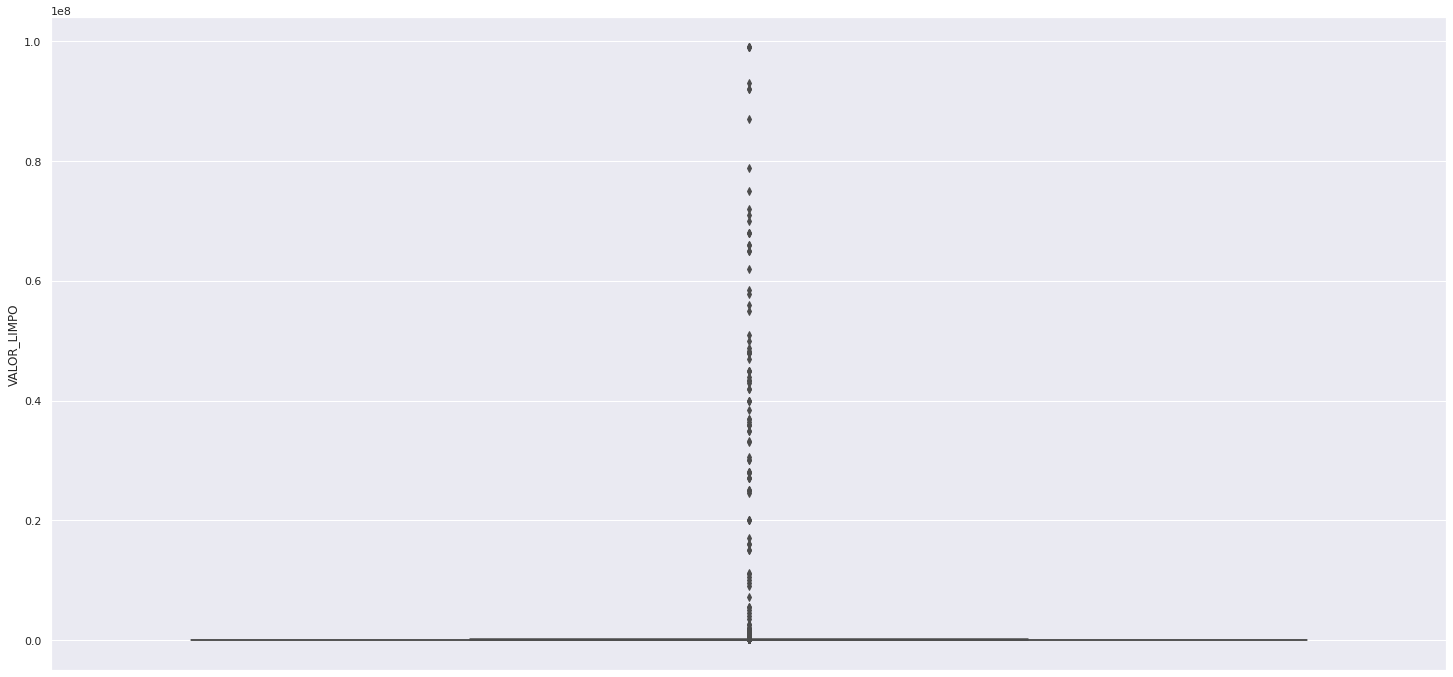

In [27]:
# boxplot with outliers
sns.boxplot(y=df_metadados_sem_outlier.VALOR_LIMPO);

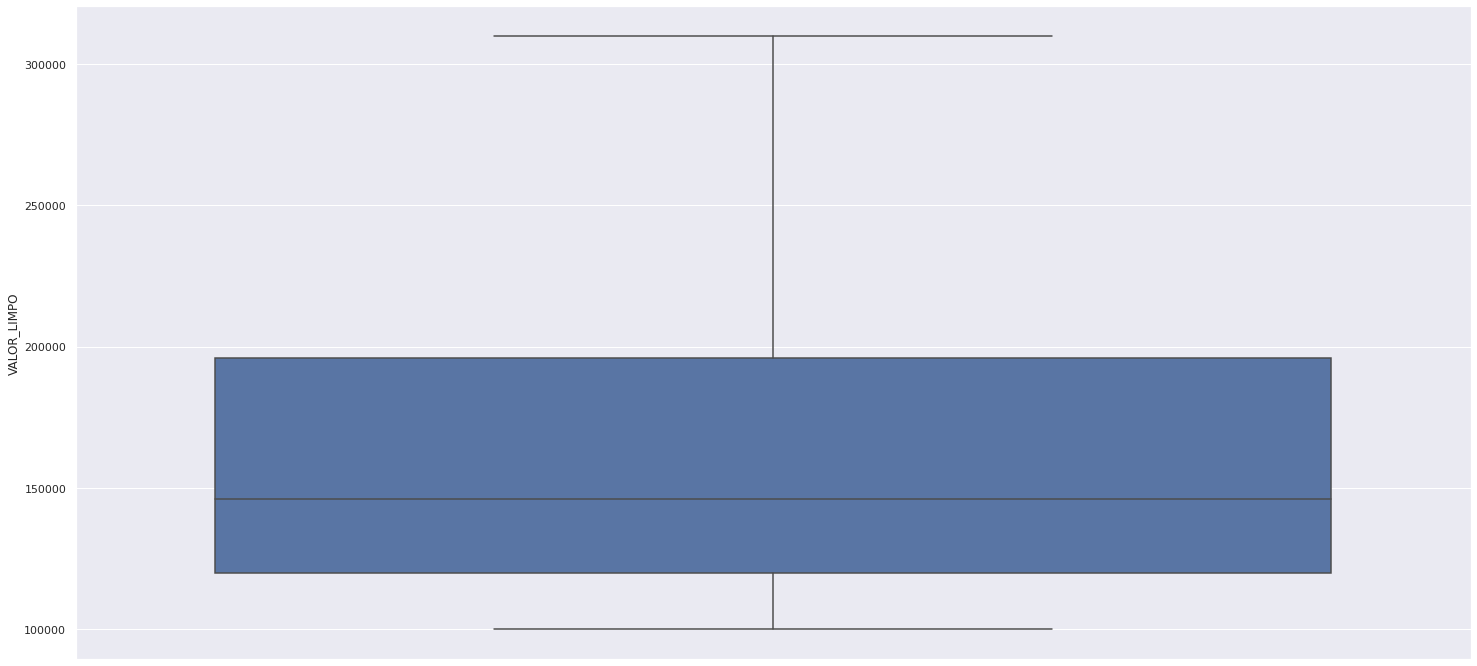

In [28]:
# boxplot without outliers
sns.boxplot(y='VALOR_LIMPO',data=df_metadados_sem_outlier.query("VALOR_LIMPO > 100000"),showfliers=False);

In [29]:
df_metadados_sem_outlier=df_metadados_sem_outlier.query('VALOR_LIMPO <= 300000')
df_metadados_sem_outlier.to_csv('/home/tc0019/DS/car_price_prediction/data/raw/df_metadados_sem_outlier.csv', index=False)
df_metadados_sem_outlier.shape

(76418, 8)

- KM 

In [30]:
df_metadados_sem_outlier.describe().round()

,ID,Ano,KM,VALOR_LIMPO
count,7.641800e+04,76418.0,7.641800e+04,76418.0
mean,1.009776e+09,2014.0,3.448618e+06,74496.0
std,3.235223e+07,7.0,1.579151e+08,53338.0
min,4.733270e+08,1950.0,0.000000e+00,5200.0
25%,1.007333e+09,2012.0,3.407500e+04,37900.0
50%,1.020720e+09,2016.0,7.000000e+04,59900.0
75%,1.026619e+09,2019.0,1.140000e+05,94990.0
max,1.028464e+09,2023.0,1.000000e+10,300000.0


In [31]:
df_metadados_sem_outlier.query('KM > 100000').sort_values('KM').sample(10)

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
26834,1018820994,sentra,mt,2011.0,128000.0,automático,flex,36000.0
75453,1028183967,fox 2010 g2 carro muito econômico!!!,sc,2010.0,117500.0,manual,flex,29900.0
44666,1015705888,tucson automático,ro,2008.0,130496.0,automático,gasolina,29000.0
16258,1025494573,corsa classic 2014 preto 1.0 impecável (s/entr...,pr,2014.0,135246.0,manual,flex,17940.0
16500,1027988843,siena fire celebration 2012 direção hidráulica...,pr,2012.0,139000.0,manual,flex,26850.0
18311,1024619392,hyundai sonata gls 2.4 aut.,df,2012.0,153749.0,automático,gasolina,65900.0
42045,1027619004,focus titanium,rs,2011.0,159000.0,automático,flex,43500.0
29601,1028187124,honda civic 99,mg,1999.0,200000.0,manual,gasolina,15000.0
51341,1027453536,ranger 2018/2019 top,ms,2018.0,104171.0,automático,diesel,160000.0
64740,1018098335,astra 2009/2010,ma,2010.0,160000.0,manual,flex,24000.0


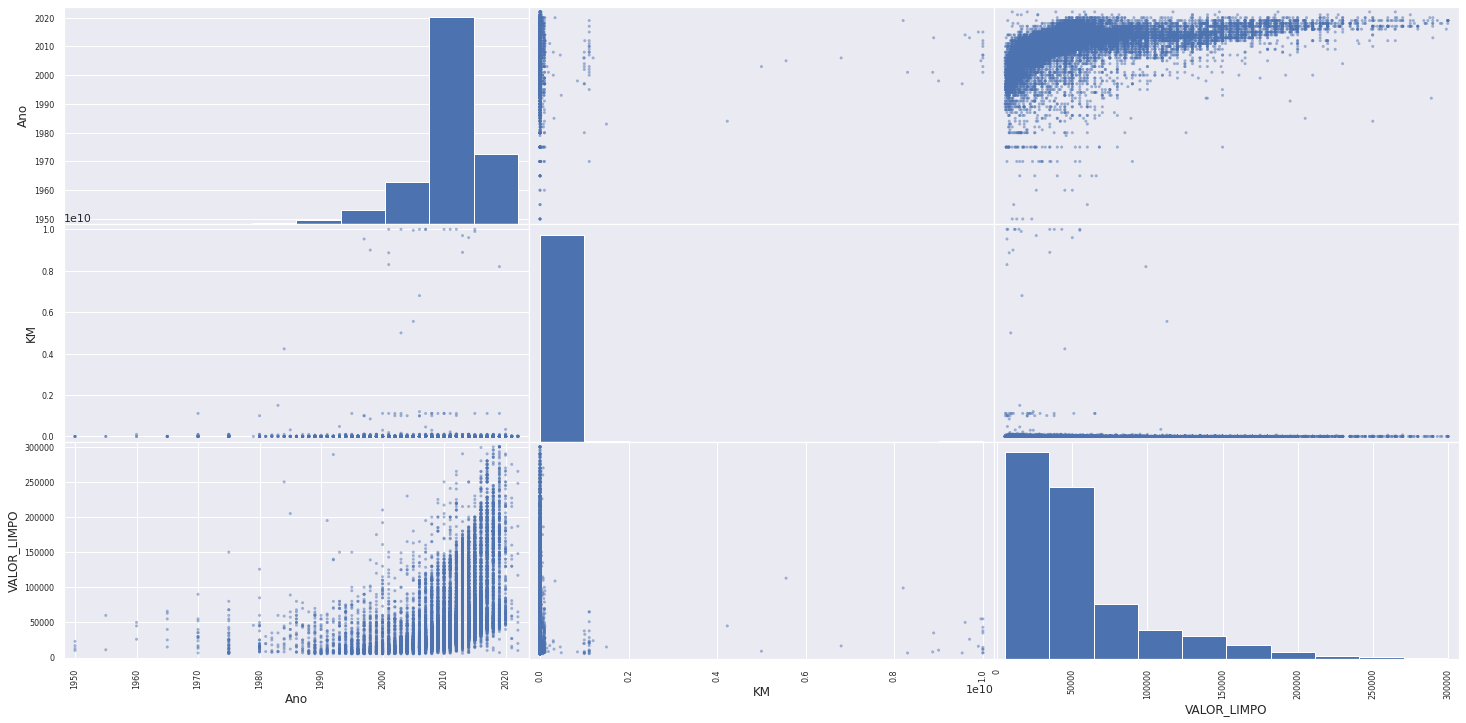

In [32]:
dados=df_metadados_sem_outlier.query('KM > 100000')
pd.plotting.scatter_matrix(dados[colunas_numericas]);

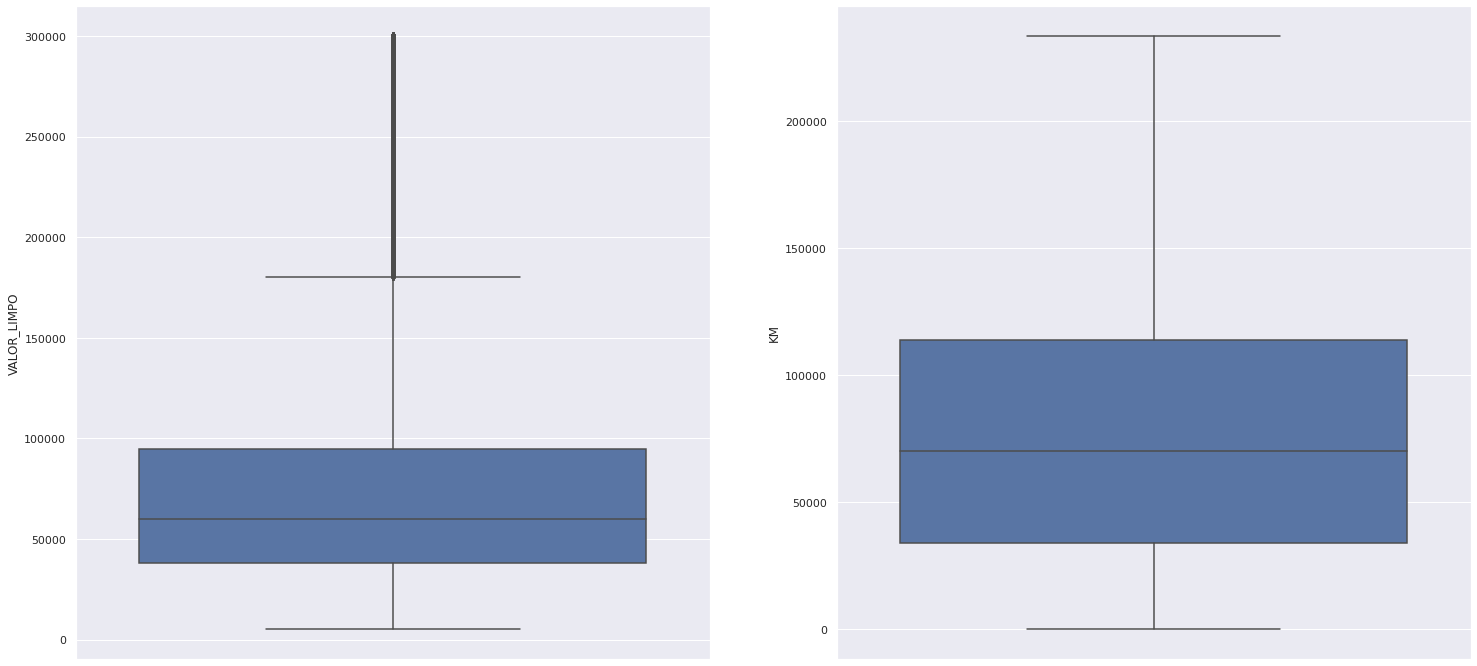

In [33]:
# boxplot with outliers
plt.subplot(1,2,1)
sns.boxplot(y=df_metadados_sem_outlier.VALOR_LIMPO);

# boxplot without outliers
plt.subplot(1,2,2)
sns.boxplot(y='KM',data=df_metadados_sem_outlier, showfliers=False);

CONCLUSION

- There are many outliers in KM, with the highest concentration being in KM up to ~200,000 KM
    - analyzing the boxplots without an outlier, we can confirm that the values up to 250,000 km are the most "normal".
- Only use ads for new/used cars.

    - Zero KM cars usually come with informed values of installments, financing, entry and the like, this can bias and harm the model
- Therefore, we will eliminate all vehicles with KM 0 and eliminate KM using the boxplot outlier (IQR)

[34075.     0.]
[114000. 233522.]


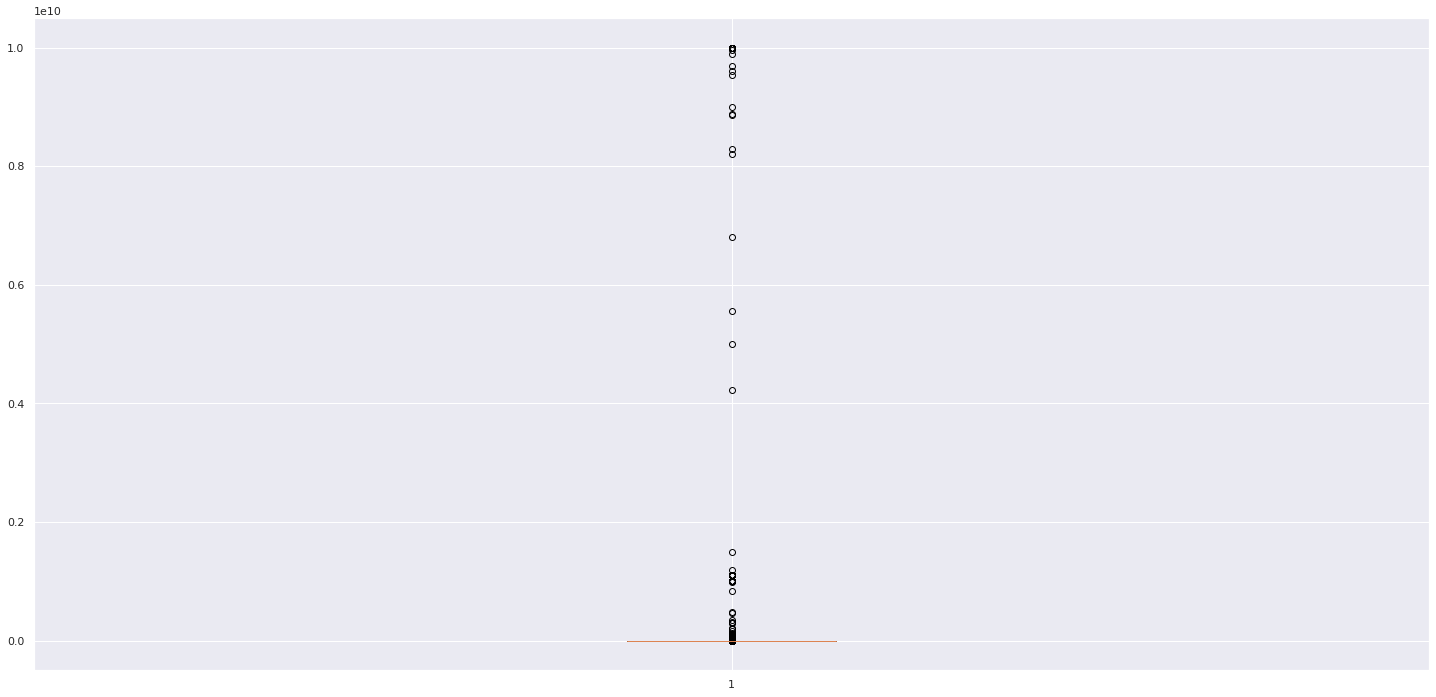

In [34]:
# Removing outliers through whiskers 
boxplot_km=plt.boxplot(x=df_metadados_sem_outlier.KM)
# lower limit and first quartile 
print(boxplot_km['whiskers'][0].get_ydata())
# third quartile and upper limit 
print(boxplot_km['whiskers'][1].get_ydata())

<AxesSubplot:ylabel='KM'>

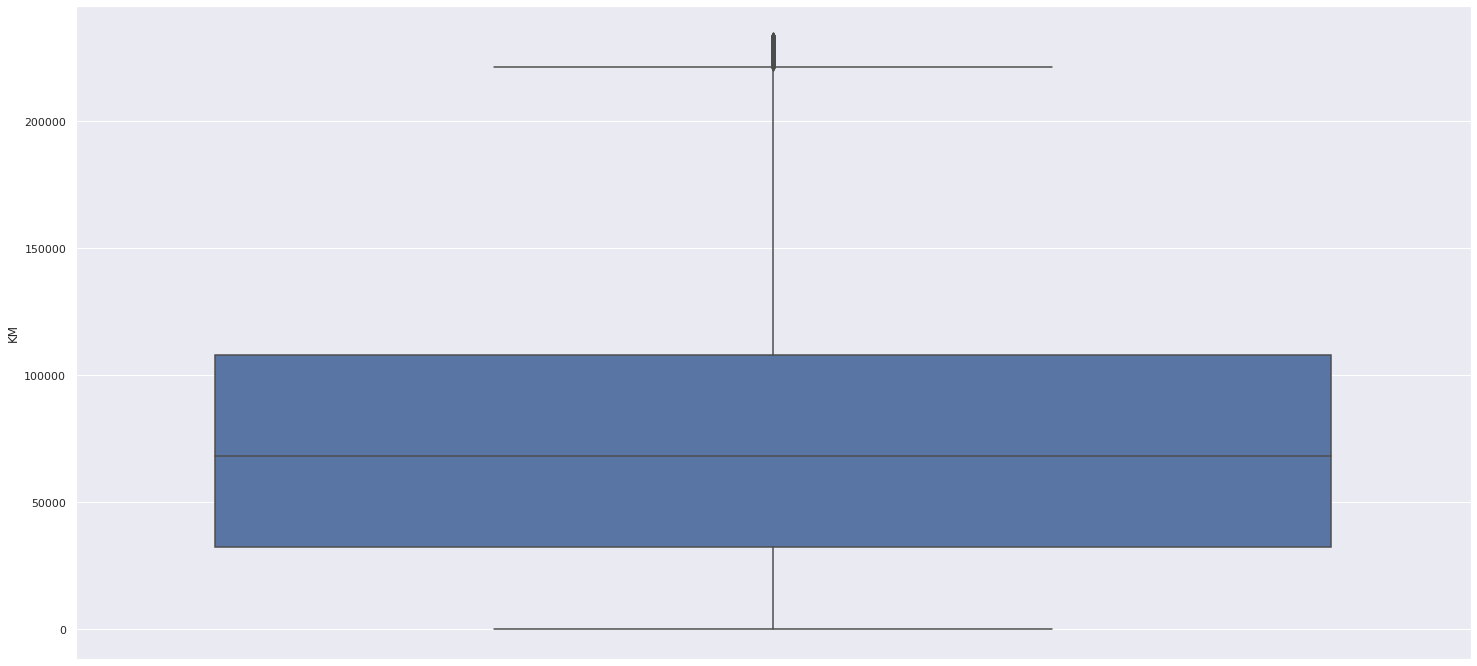

In [35]:
outlier=boxplot_km['whiskers'][1].get_ydata()[1]
sns.boxplot(y='KM', data=df_metadados_sem_outlier.query(f'KM <={outlier}'))

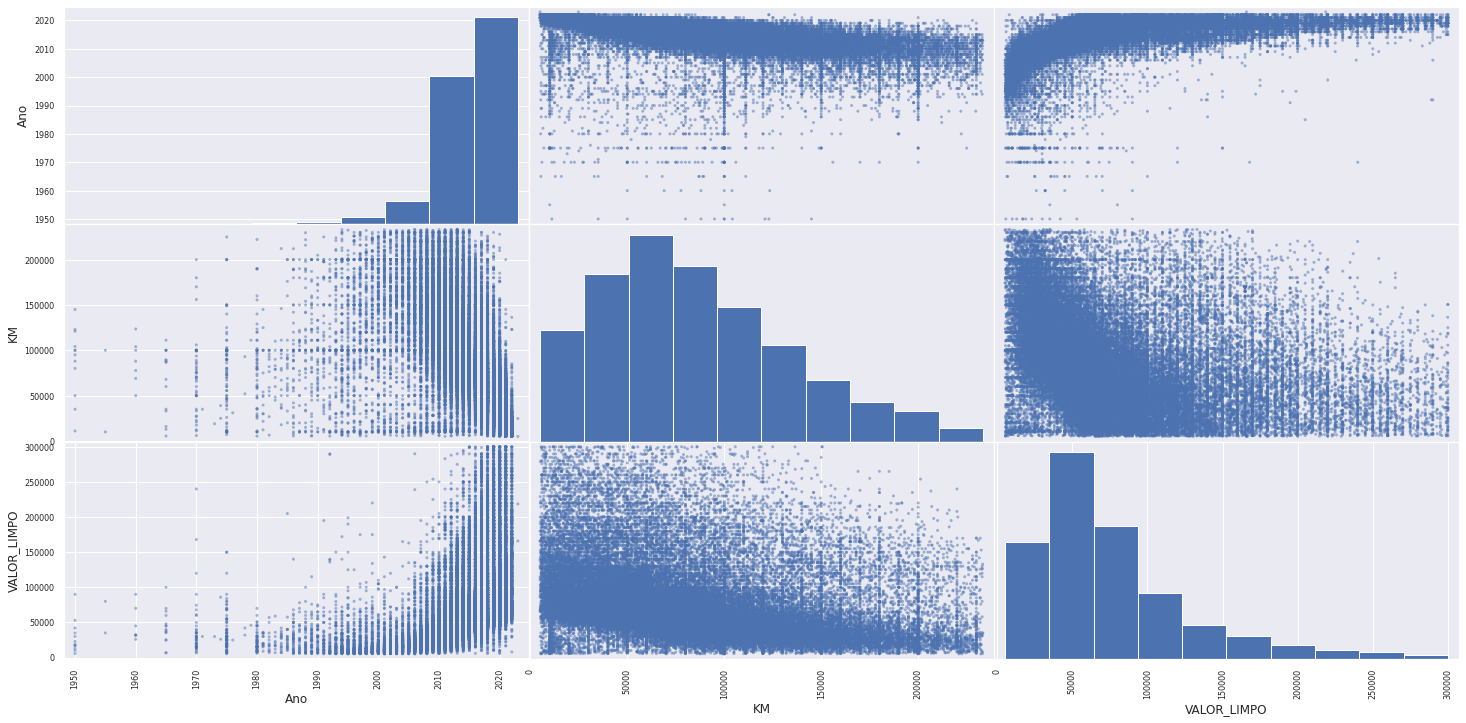

In [36]:
dados = df_metadados_sem_outlier.query(f"KM > 5000 and KM < {outlier}")
pd.plotting.scatter_matrix(dados[colunas_numericas]);

In [37]:
df_metadados_sem_outlier_2=df_metadados_sem_outlier.query(f"KM > 5000 and KM < {outlier}")
df_metadados_sem_outlier_2.to_csv('/home/tc0019/DS/car_price_prediction/data/raw/df_metadados_sem_outlier_2.csv')
df_metadados_sem_outlier_2.shape

(64022, 8)

Year

In [38]:
df_metadados_sem_outlier_2.query("Ano < 2000").head()

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO
107,1028200549,gol cht 1.0,ce,1991.0,180000.0,manual,gasolina,11200.0
281,1028157584,carro no ponto de transferir,ce,1997.0,10000.0,manual,gasolina,6700.0
407,1015811926,extra extra !! relíquia gol 1999,ce,1999.0,22300.0,manual,gasolina,26900.0
418,1028124276,parati 95,ce,1995.0,95860.0,manual,gasolina,15000.0
581,1022384853,fyber 2000 - 1990,ce,1990.0,68519.0,manual,gasolina,30000.0


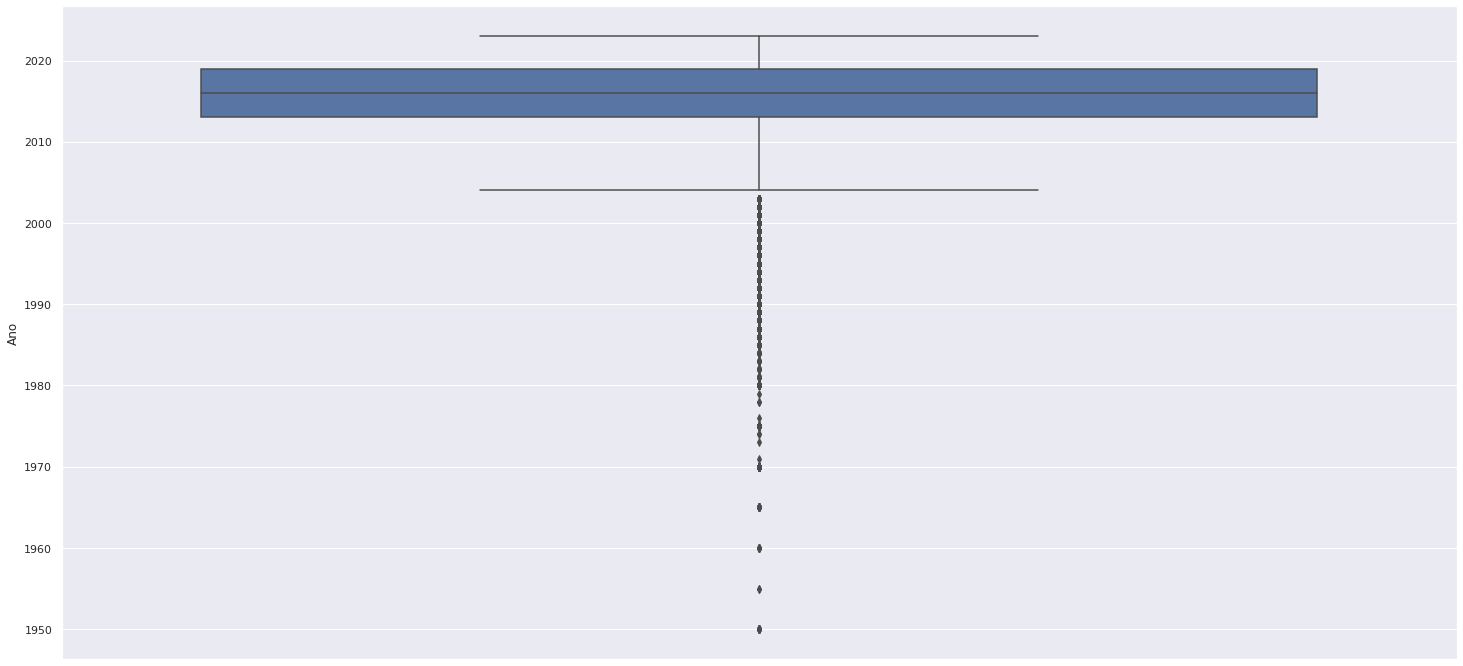

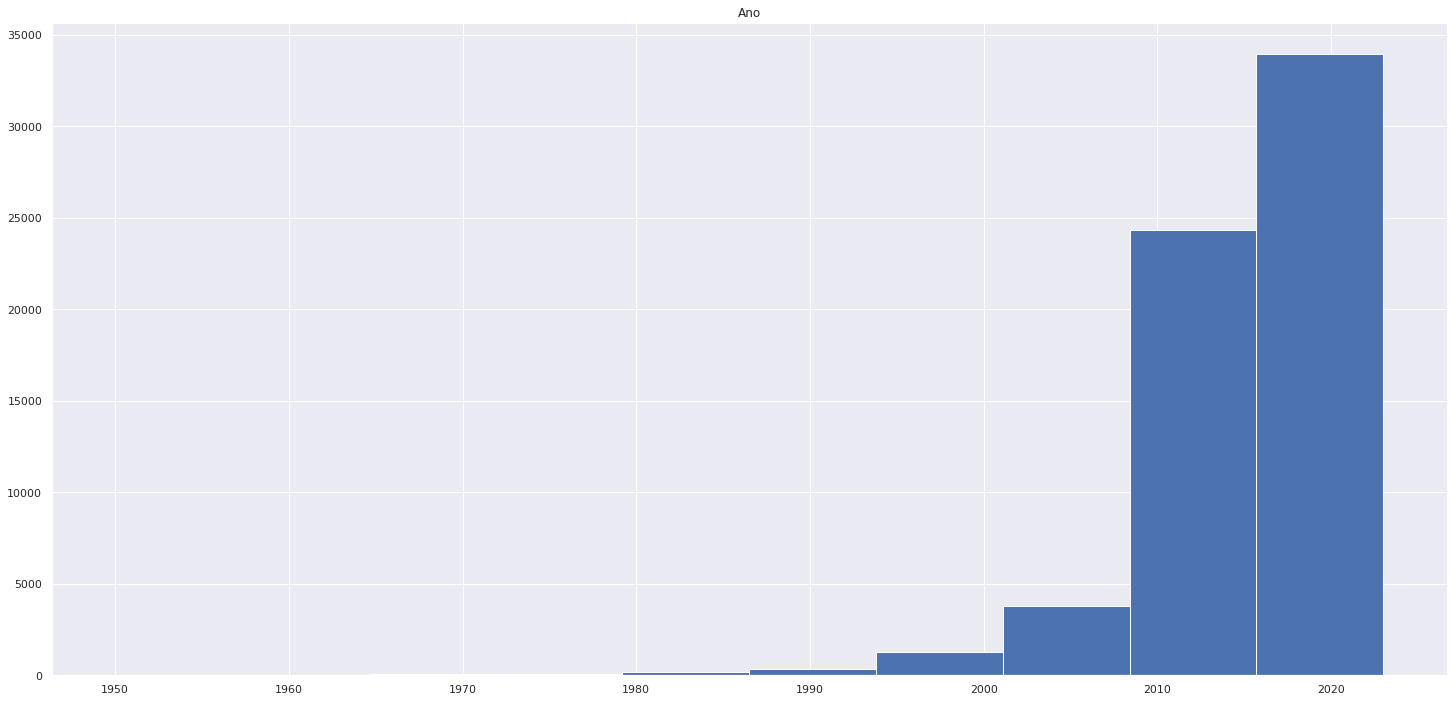

In [39]:
sns.boxplot(y='Ano', data=df_metadados_sem_outlier_2);
df_metadados_sem_outlier_2[['Ano']].hist();

[2013. 2004.]
[2019. 2023.]


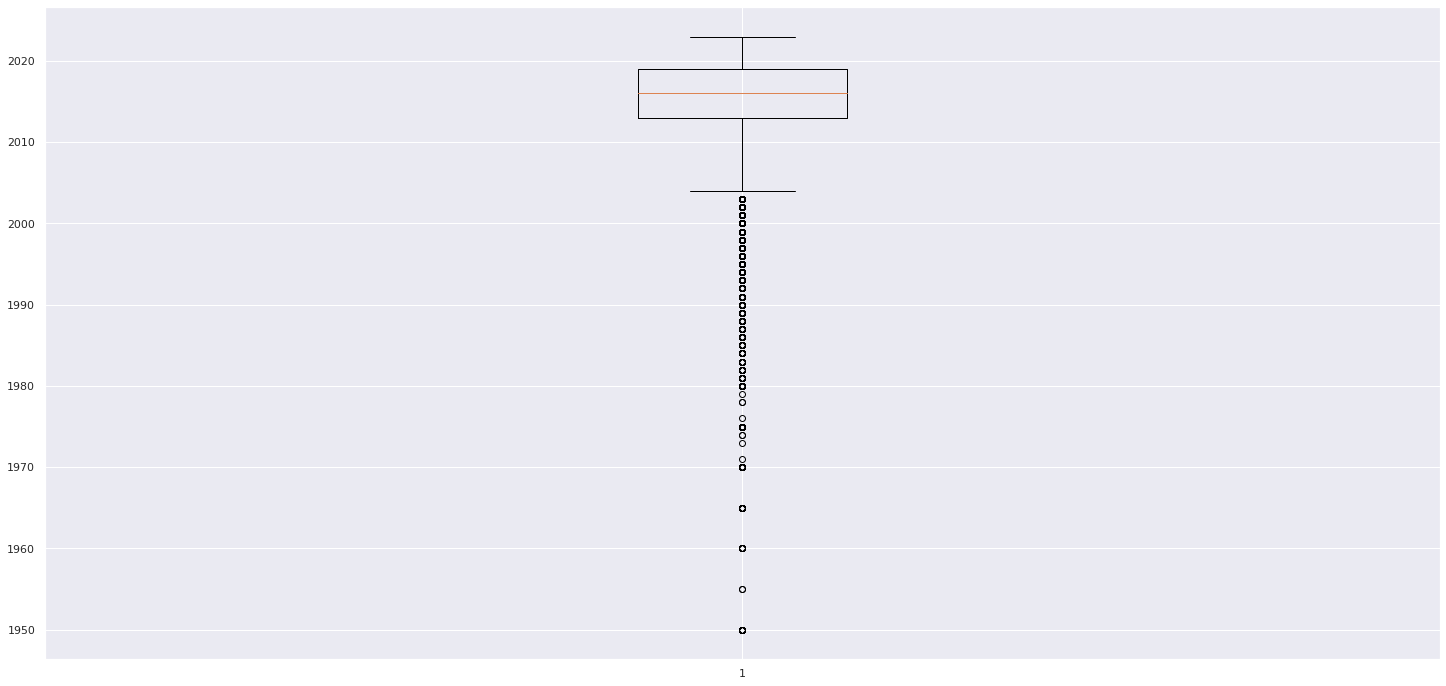

In [40]:
# Removing outliers through whiskers 
boxplot_year=plt.boxplot(x=df_metadados_sem_outlier_2.Ano)
# lower limit and first quartile 
print(boxplot_year['whiskers'][0].get_ydata())
# third quartile and upper limit 
print(boxplot_year['whiskers'][1].get_ydata())

(62526, 8)


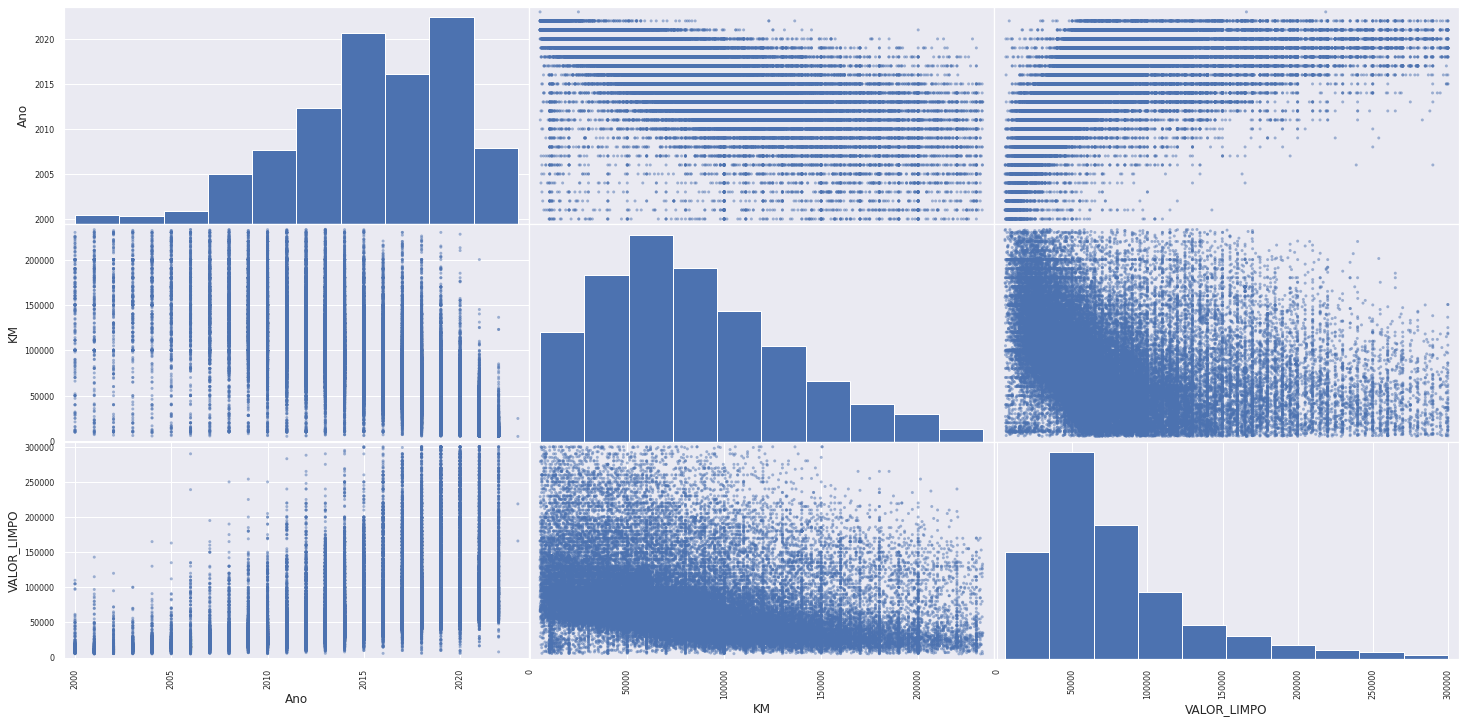

In [41]:
dados=df_metadados_sem_outlier_2.query(f'Ano >= 2000')
print(dados.shape)
pd.plotting.scatter_matrix(dados[colunas_numericas]);

In [42]:
df_metadados_sem_outlier_3=df_metadados_sem_outlier_2.query(f'Ano >= 2000')
df_metadados_sem_outlier_3.to_csv('/home/tc0019/DS/car_price_prediction/data/raw/df_metadados_sem_outlier_3.csv')

# LOG DATA NORMALIZATION

In [43]:
df_metadados_sem_outlier_3.loc[:, 'VALOR_LIMPO_LOG']=np.log(df_metadados_sem_outlier_3.VALOR_LIMPO)
df_metadados_sem_outlier_3.loc[:, 'KM_LOG']=np.log(df_metadados_sem_outlier_3.KM)
df_metadados_sem_outlier_3.loc[:, 'ANO_LOG']=np.log(df_metadados_sem_outlier_3.Ano)
df_metadados_sem_outlier_3.to_csv('/home/tc0019/DS/car_price_prediction/data/raw/df_metadados_sem_outlier_3.csv')

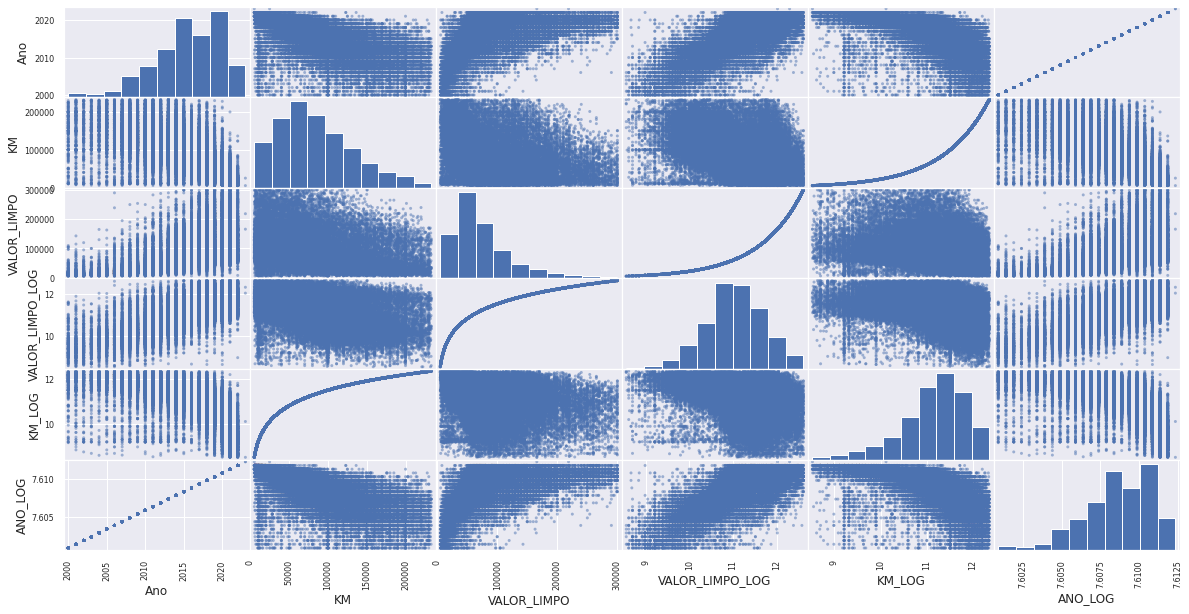

In [44]:
pd.plotting.scatter_matrix(df_metadados_sem_outlier_3.drop(columns=['ID']), figsize=(20,10))
plt.show()

# Discrete variables

In [45]:
df_metadados_sem_outlier_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62526 entries, 0 to 79116
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               62526 non-null  int64  
 1   TITULO           62526 non-null  object 
 2   UF               62526 non-null  object 
 3   Ano              62526 non-null  float64
 4   KM               62526 non-null  float64
 5   CAMBIO           62526 non-null  object 
 6   COMBUSTIVEL      62526 non-null  object 
 7   VALOR_LIMPO      62526 non-null  float64
 8   VALOR_LIMPO_LOG  62526 non-null  float64
 9   KM_LOG           62526 non-null  float64
 10  ANO_LOG          62526 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 5.7+ MB


Ads proportion by UF 

<AxesSubplot:xlabel='UF', ylabel='count'>

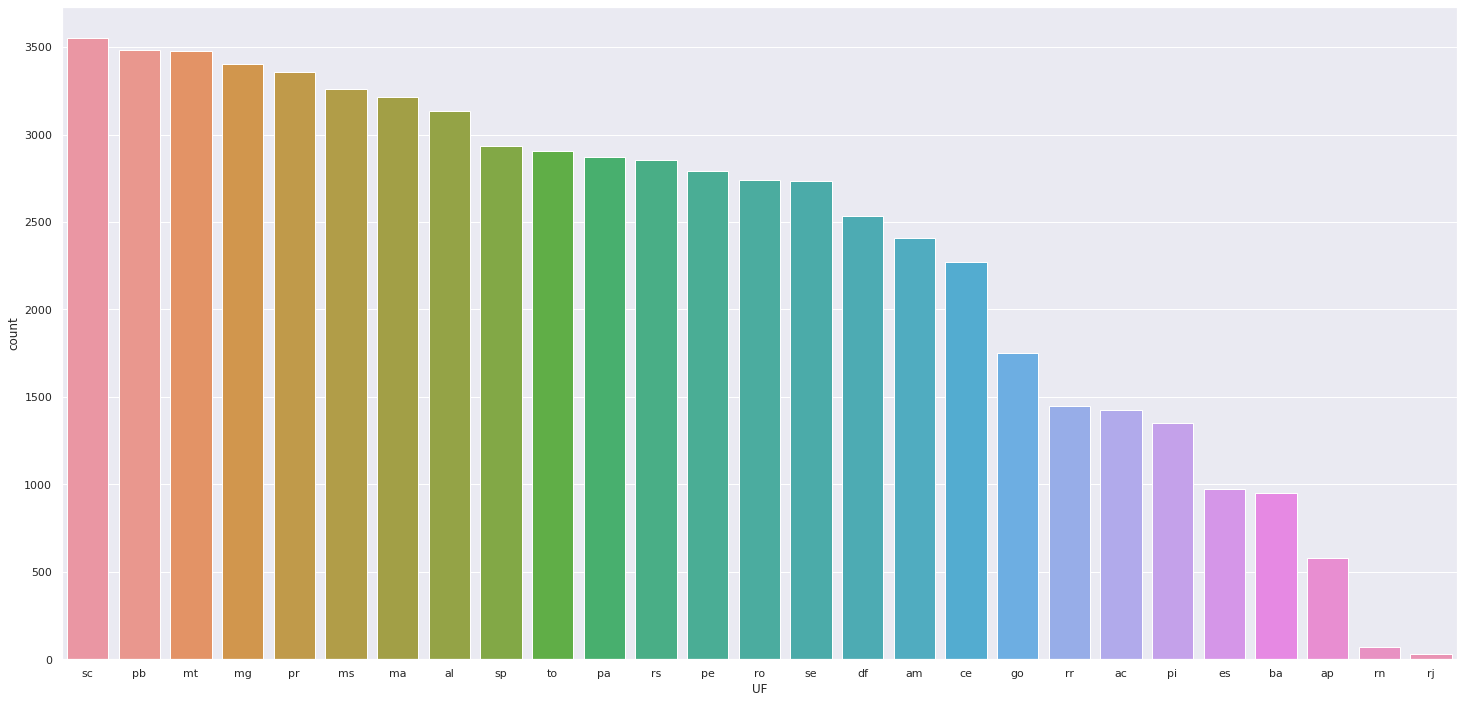

In [46]:
sns.countplot(x='UF', data=df_metadados_sem_outlier_3, order = df_metadados_sem_outlier_3['UF'].value_counts().index)

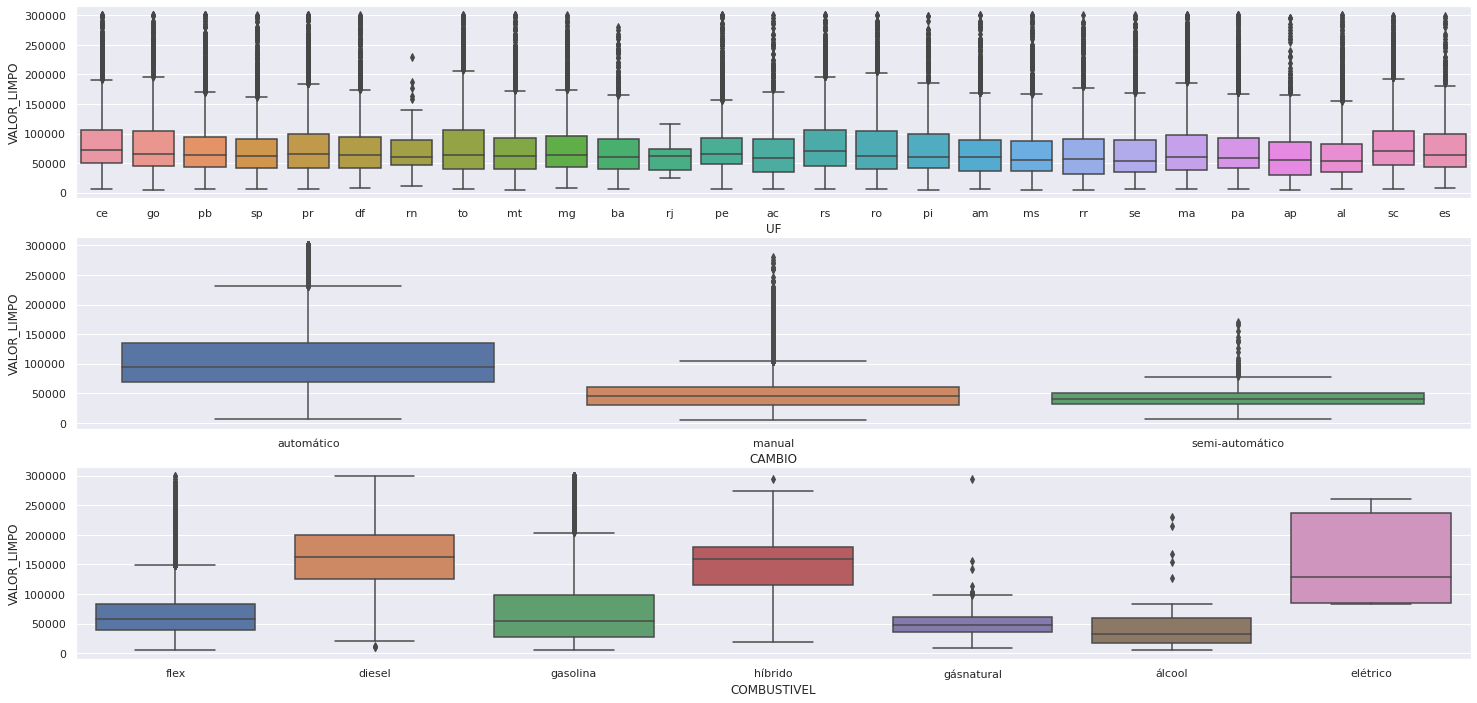

In [47]:
fig, axs=plt.subplots(3,1)

sns.boxplot( x='UF', y='VALOR_LIMPO', data=df_metadados_sem_outlier_3, ax=axs[0]);
sns.boxplot( x='CAMBIO', y='VALOR_LIMPO', data=df_metadados_sem_outlier_3, ax=axs[1]);
sns.boxplot( x='COMBUSTIVEL', y='VALOR_LIMPO', data=df_metadados_sem_outlier_3, ax=axs[2]);

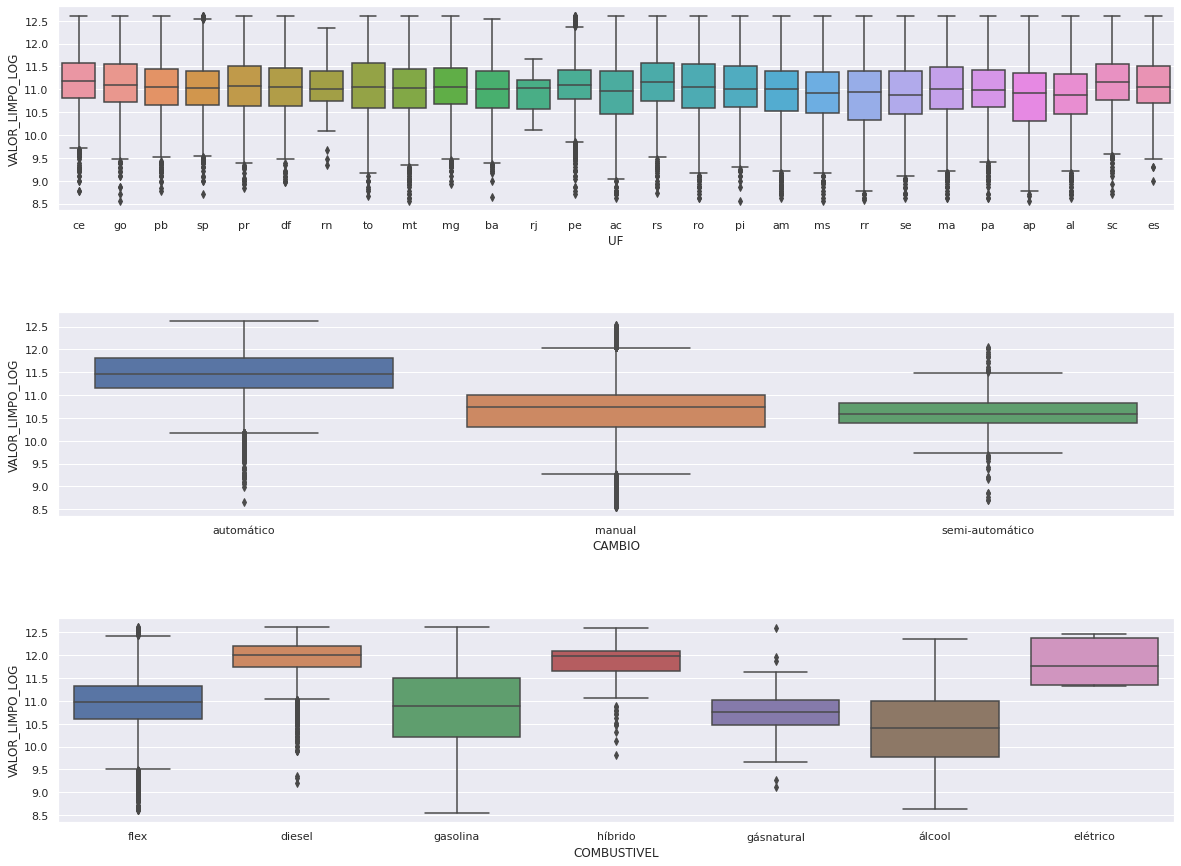

In [48]:
# log values
fig, axs = plt.subplots(3,1,figsize=(20,15))
fig.subplots_adjust(hspace = .5, wspace=.3)

sns.boxplot(x = 'UF', y = 'VALOR_LIMPO_LOG',data = df_metadados_sem_outlier_3,ax = axs[0]);
sns.boxplot(x = 'CAMBIO', y = 'VALOR_LIMPO_LOG',data = df_metadados_sem_outlier_3,ax = axs[1]);
sns.boxplot(x = 'COMBUSTIVEL', y = 'VALOR_LIMPO_LOG',data = df_metadados_sem_outlier_3,ax = axs[2]);

# Encoding

In [49]:
dummies_cambio_combustivel = pd.get_dummies(df_metadados_sem_outlier_3[['CAMBIO','COMBUSTIVEL']],prefix='',prefix_sep='')
dummies_cambio_combustivel.head()

,automático,manual,semi-automático,diesel,elétrico,flex,gasolina,gásnatural,híbrido,álcool
0,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0


In [50]:
# concating dfs
df_metadados_final = pd.concat([df_metadados_sem_outlier_3, dummies_cambio_combustivel],axis=1)
df_metadados_final.to_csv('/home/tc0019/DS/car_price_prediction/data/raw/df_metadados_final.csv')
df_metadados_final.head()

,ID,TITULO,UF,Ano,KM,CAMBIO,COMBUSTIVEL,VALOR_LIMPO,VALOR_LIMPO_LOG,KM_LOG,ANO_LOG,automático,manual,semi-automático,diesel,elétrico,flex,gasolina,gásnatural,híbrido,álcool
0,1026520834,nissan kicks sl cvt 2019,ce,2019.0,32124.0,automático,flex,103900.0,11.551184,10.377359,7.610358,1,0,0,0,0,1,0,0,0,0
1,1016380244,hrv 2016 lx 1.8 flex!,ce,2016.0,85000.0,automático,flex,86900.0,11.372513,11.350407,7.608871,1,0,0,0,0,1,0,0,0,0
3,999438981,mitsubishi pajero dakar hpe 3.2 4x4 t.i dies 5...,ce,2015.0,61605.0,automático,diesel,169900.0,12.042965,11.028498,7.608374,1,0,0,1,0,0,0,0,0,0
4,1005004091,jeep renegade longitude 1.8 4x2 flex 16v aut.,ce,2016.0,50979.0,automático,flex,85900.0,11.360939,10.839169,7.608871,1,0,0,0,0,1,0,0,0,0
5,1028210223,strada 1.4 2008 básica,ce,2008.0,59000.0,manual,flex,31900.0,10.370361,10.985293,7.604894,0,1,0,0,0,1,0,0,0,0


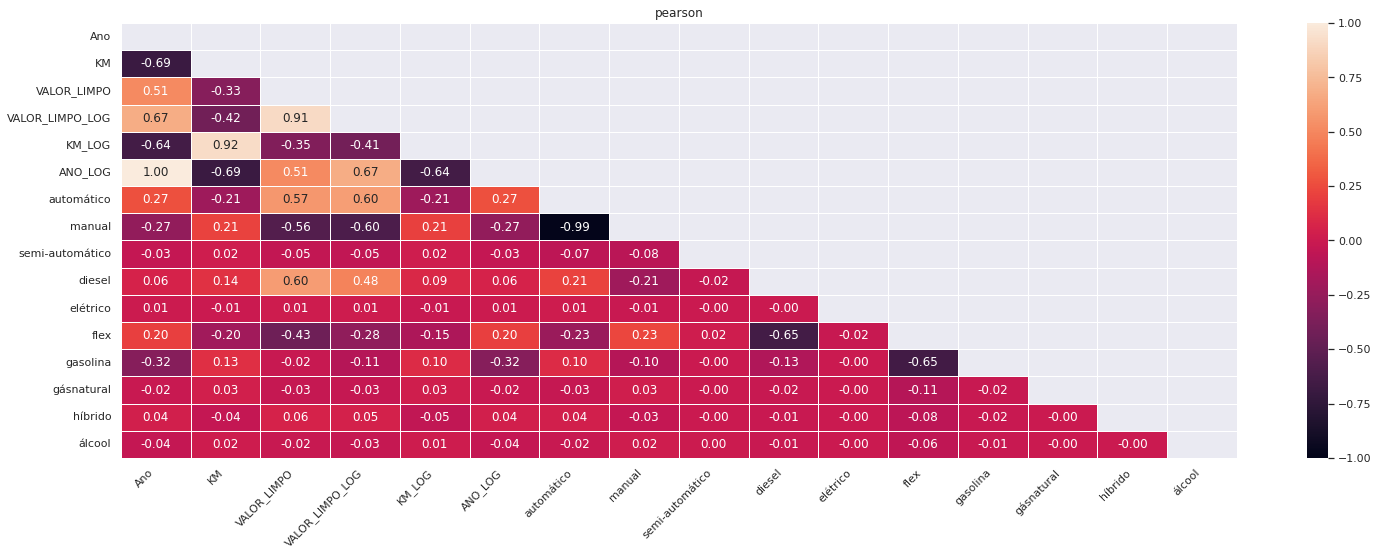

In [51]:
# correlation=df_metadados_final.select_dtypes(include=['int64', 'float64','uint8'])
# sns.heatmap(correlation, cmap='Greens', annot=True);

fig, axs = plt.subplots(1,1, figsize=(25, 8), sharey=False)
fig.subplots_adjust(hspace=.5, wspace=1.35)

dados    = df_metadados_final.drop(columns=['ID']).copy()
corr     = dados.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=False, fmt=".2f",linewidths=.5,ax = axs)

axs.set_title("pearson")
axs.set_xticklabels(axs.get_xticklabels(), rotation = 45,ha="right")

plt.show()